#Getting Started

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout


In [2]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


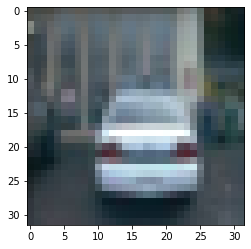

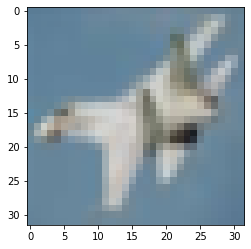

In [3]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

These are the classification classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Label: [0]
Pixel values: [[[255 255 255]
  [252 254 255]
  [231 234 235]
  ...
  [189 200 204]
  [187 198 202]
  [186 197 201]]

 [[255 255 255]
  [249 251 252]
  [217 221 223]
  ...
  [187 198 202]
  [185 196 200]
  [184 194 199]]

 [[255 255 255]
  [240 242 244]
  [190 193 197]
  ...
  [186 197 201]
  [184 195 199]
  [184 193 198]]

 ...

 [[132 131 126]
  [136 135 130]
  [144 143 138]
  ...
  [132 132 122]
  [131 131 121]
  [123 120 114]]

 [[129 128 122]
  [132 131 126]
  [139 138 133]
  ...
  [137 137 126]
  [133 133 123]
  [124 122 116]]

 [[131 128 123]
  [133 131 126]
  [140 137 132]
  ...
  [135 133 124]
  [139 137 130]
  [132 131 125]]]


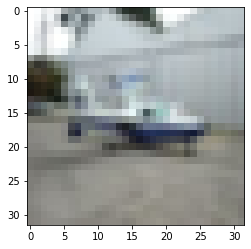

In [4]:
# Show label and pixel values of an image
print("Label:", y_train[0])
print("Pixel values:", X_train[0])

# Show the image
imgplot = plt.imshow(X_train[0])
plt.show()

#Process and normalize the image

In [5]:
# Normalize pixel values
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

Label: [0]
Pixel values: [[[1.         1.         1.        ]
  [0.98823529 0.99607843 1.        ]
  [0.90588235 0.91764706 0.92156863]
  ...
  [0.74117647 0.78431373 0.8       ]
  [0.73333333 0.77647059 0.79215686]
  [0.72941176 0.77254902 0.78823529]]

 [[1.         1.         1.        ]
  [0.97647059 0.98431373 0.98823529]
  [0.85098039 0.86666667 0.8745098 ]
  ...
  [0.73333333 0.77647059 0.79215686]
  [0.7254902  0.76862745 0.78431373]
  [0.72156863 0.76078431 0.78039216]]

 [[1.         1.         1.        ]
  [0.94117647 0.94901961 0.95686275]
  [0.74509804 0.75686275 0.77254902]
  ...
  [0.72941176 0.77254902 0.78823529]
  [0.72156863 0.76470588 0.78039216]
  [0.72156863 0.75686275 0.77647059]]

 ...

 [[0.51764706 0.51372549 0.49411765]
  [0.53333333 0.52941176 0.50980392]
  [0.56470588 0.56078431 0.54117647]
  ...
  [0.51764706 0.51764706 0.47843137]
  [0.51372549 0.51372549 0.4745098 ]
  [0.48235294 0.47058824 0.44705882]]

 [[0.50588235 0.50196078 0.47843137]
  [0.5176470

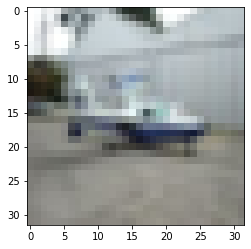

In [6]:
# Show label and pixel values of an image after normalize
print("Label:", y_train[0])
print("Pixel values:", X_train_norm[0])

# Show the image
imgplot = plt.imshow(X_train_norm[0])
plt.show()

#First DNN

In [7]:
# Initialize dnn_model as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model = Sequential() # Initialize a sequential model.

dnn_model.add(Conv2D(filters=32, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model.add(Flatten()) # Flatten the vector to 1D
dnn_model.add(Dense(64, activation='relu')) # Add FC layer and Relu activation
dnn_model.add(Dense(32, activation='relu')) # Add FC layer and Relu activation
dnn_model.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [8]:
# Compile the model
dnn_model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history = dnn_model.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=256, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/10
176/176 [==============================] - 8s 30ms/step - loss: 1.9829 - accuracy: 0.2744 - val_loss: 1.7495 - val_accuracy: 0.3598
Epoch 2/10
176/176 [==============================] - 5s 27ms/step - loss: 1.6141 - accuracy: 0.4098 - val_loss: 1.5307 - val_accuracy: 0.4468
Epoch 3/10
176/176 [==============================] - 5s 27ms/step - loss: 1.4695 - accuracy: 0.4670 - val_loss: 1.4312 - val_accuracy: 0.4852
Epoch 4/10
176/176 [==============================] - 4s 22ms/step - loss: 1.3896 - accuracy: 0.4959 - val_loss: 1.3971 - val_accuracy: 0.4924
Epoch 5/10
176/176 [==============================] - 3s 20ms/step - loss: 1.3499 - accuracy: 0.5093 - val_loss: 1.3934 - val_accuracy: 0.4842
Epoch 6/10
176/176 [==============================] - 4s 21ms/step - loss: 1.3051 - accuracy: 0.5289 - val_loss: 1.3622 - val_accuracy: 0.5032
Epoch 7/10
176/176 [==============================] - 4s 21ms/step - loss: 1.2645 - accuracy: 0.5455 - val_loss: 1.3247 - val_accuracy: 0.5164

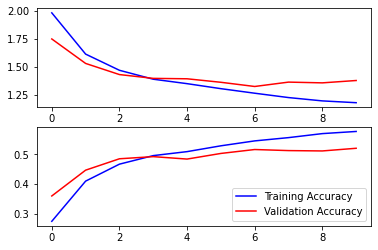

In [9]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')
# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [10]:
# Show the model performance
result = dnn_model.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.3495 - accuracy: 0.5277
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 1.349482536315918, accuracy = 0.5277000069618225


#Second DNN

In [11]:
# Initialize dnn_model_2 as a second Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
dnn_model_2 = Sequential() # Initialize a sequential model.

dnn_model_2.add(Conv2D(filters=32, input_shape=(32, 32, 3), kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model_2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model_2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model_2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) # Add 2D Convolutional layer
dnn_model_2.add(MaxPooling2D((2, 2))) # Add Max Pooling layer

dnn_model_2.add(Flatten()) # Flatten the vector to 1D
dnn_model_2.add(Dense(64, activation='relu')) # Add FC layer and Relu activation
dnn_model_2.add(Dense(10, activation='softmax')) # Add FC layer and Softmax activation for classification

#Model Summary
dnn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4096)             

In [12]:
# Compile the model
dnn_model_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy']) # Define initial learning rate and metrics.

# Train the model. Using Colab for training
history_2 = dnn_model_2.fit(X_train_norm, y_train, # Data feature and data label
                    batch_size=256, # Batch size
                    epochs=10, # Number of training epochs
                    validation_data=(X_val_norm, y_val)) # Validation set

Epoch 1/10
176/176 [==============================] - 3s 17ms/step - loss: 1.8637 - accuracy: 0.3141 - val_loss: 1.6134 - val_accuracy: 0.4148
Epoch 2/10
176/176 [==============================] - 3s 16ms/step - loss: 1.5233 - accuracy: 0.4447 - val_loss: 1.4660 - val_accuracy: 0.4624
Epoch 3/10
176/176 [==============================] - 3s 16ms/step - loss: 1.3750 - accuracy: 0.5035 - val_loss: 1.3265 - val_accuracy: 0.5246
Epoch 4/10
176/176 [==============================] - 3s 16ms/step - loss: 1.2746 - accuracy: 0.5447 - val_loss: 1.2918 - val_accuracy: 0.5336
Epoch 5/10
176/176 [==============================] - 3s 16ms/step - loss: 1.1991 - accuracy: 0.5756 - val_loss: 1.2105 - val_accuracy: 0.5638
Epoch 6/10
176/176 [==============================] - 3s 16ms/step - loss: 1.1583 - accuracy: 0.5904 - val_loss: 1.2116 - val_accuracy: 0.5710
Epoch 7/10
176/176 [==============================] - 3s 16ms/step - loss: 1.1243 - accuracy: 0.6014 - val_loss: 1.2397 - val_accuracy: 0.5578

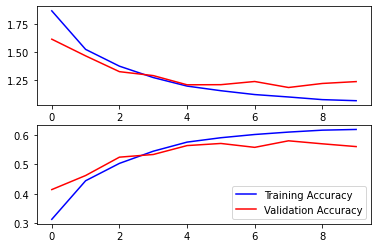

In [13]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history_2.history['loss'], color='b',label='Training Loss')
ax[0].plot(history_2.history['val_loss'],color='r',label='Validation Loss')
# Plot training and validation accuracy
ax[1].plot(history_2.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history_2.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [14]:
# Show the model performance
result_2 = dnn_model_2.evaluate(X_test_norm, y_test) # If unspecified, batch_size will default to 32
print(dnn_model_2.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in dnn_model.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result_2[0],result_2[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.2143 - accuracy: 0.5778
['loss', 'accuracy']
Loss and accuracy on the test set: loss = 1.2142589092254639, accuracy = 0.5777999758720398


After trying several model architecture. I'm surprise that the models with about 300,000 parameters perform better than models with more than 1 million param. And since the initialization will be different every time I run the model, it makes it harder to determine which architecture has the best performance. From my observation, the highest test accuracy I can get is around 63%. I also tried to add Dropout layers into the model but it seems like it doesn't make a big different. In average, the accuracy is in the range of 40-50%

#Check Prediction

Let's check some of the prediction that the second model dnn_model_2 made

In [15]:
#make prediction on the test set
pred = dnn_model_2.predict(X_test_norm)

313/313 [==============================] - 1s 2ms/step


In [48]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(pred, axis=1) 

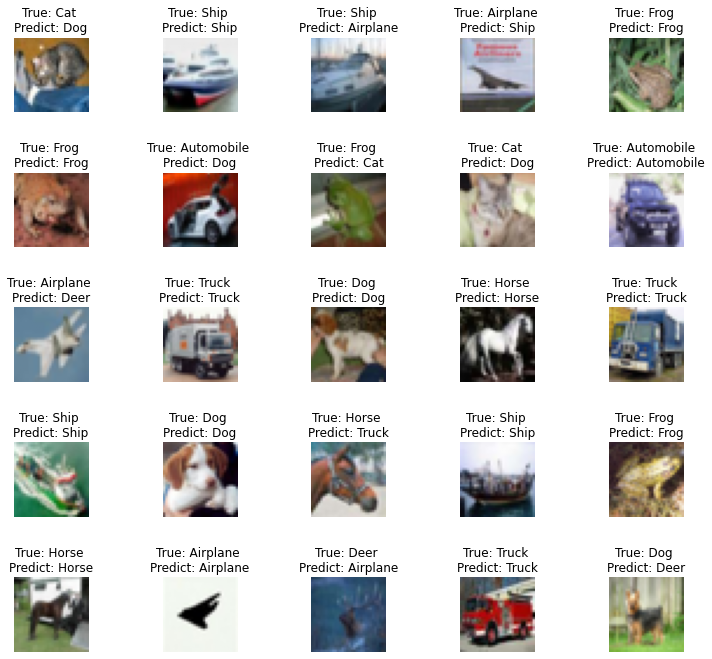

In [49]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test_norm[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[y_test[i][0]], labels[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)